In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd
import csv

In [3]:
# load file
df = pd.read_excel(r'D:\cortisol_luminescence_cortisol-treatment\Nadine_SD_data\cortisol_measured.xlsx')
df = df.dropna()
df.Treatment.unique()
print(df.Treatment.unique())
df = df[(df.Treatment=='control ')| (df.Treatment=='light pulse ')|(df.Treatment=='continous')| 
       (df.Treatment=='control2')|(df.Treatment=='voltage5V_15min')]


['control ' 'light pulse ' 'continous' 'NaCl_100mM_20min' 'control2'
 'NaCl_100mM_50min' 'voltage5V_15min']


In [4]:
print(f"control mean: {df[(df.Treatment=='control ')].mean()} control std: {df[(df.Treatment=='control ')].std()}")
print(f"continous mean: {df[(df.Treatment=='continous')].mean()} continous std: {df[(df.Treatment=='continous')].std()}")
print(f"light pulse mean: {df[(df.Treatment=='light pulse ')].mean()} light pulse std: {df[(df.Treatment=='light pulse ')].std()}")
print(f"control 2 mean: {df[(df.Treatment=='control2')].mean()} control 2 std: {df[(df.Treatment=='control2')].std()}")
print(f"voltage mean: {df[(df.Treatment=='voltage5V_15min')].mean()} voltage std: {df[(df.Treatment=='voltage5V_15min')].std()}")


control mean: Log cortisol (ug/dl)     0.021525
cortisol (ug/dl)         1.089202
cortisol (ng/ml)        10.892024
dtype: float64 control std: Log cortisol (ug/dl)    0.124383
cortisol (ug/dl)        0.322890
cortisol (ng/ml)        3.228902
dtype: float64
continous mean: Log cortisol (ug/dl)     0.209450
cortisol (ug/dl)         1.783645
cortisol (ng/ml)        17.836450
dtype: float64 continous std: Log cortisol (ug/dl)    0.210018
cortisol (ug/dl)        0.902677
cortisol (ng/ml)        9.026765
dtype: float64
light pulse mean: Log cortisol (ug/dl)     0.191244
cortisol (ug/dl)         1.641810
cortisol (ng/ml)        16.418100
dtype: float64 light pulse std: Log cortisol (ug/dl)    0.152258
cortisol (ug/dl)        0.632008
cortisol (ng/ml)        6.320084
dtype: float64
control 2 mean: Log cortisol (ug/dl)   -0.100718
cortisol (ug/dl)        0.868888
cortisol (ng/ml)        8.688880
dtype: float64 control 2 std: Log cortisol (ug/dl)    0.266570
cortisol (ug/dl)        0.502181
cor

In [5]:
print(df)

          Treatment  Log cortisol (ug/dl)  cortisol (ug/dl)  cortisol (ng/ml)
0          control               0.000318          1.000733         10.007328
1          control              -0.034782          0.923034          9.230341
2          control              -0.105067          0.785115          7.851150
3          control              -0.126073          0.748044          7.480441
4          control               0.084317          1.214274         12.142743
5          control               0.112511          1.295719         12.957186
6          control               0.219453          1.657498         16.574978
7      light pulse               0.218332          1.653224         16.532244
8      light pulse               0.112769          1.296490         12.964904
9      light pulse               0.109153          1.285738         12.857384
10     light pulse              -0.024661          0.944798          9.447979
11     light pulse               0.239824          1.737099     

### load second file

In [24]:
# load second file
# focus on free swimming 30 minute treatment
df_cort = pd.read_excel(r'D:\cortisol_luminescence_cortisol-treatment\interpolated_output.xlsx')
df_cort = df_cort.dropna()
df_cort.Treatment.unique()
print(df_cort.Treatment.unique())

['FS30min_control' 'FS30min _5ngml_cortisol' 'FS30min _100ngml_cortisol'
 'FS30min_5ugml_cortisol' 'FS30min _10ugml_cortisol'
 'DL_FS30min_diluted100ng' 'DL_FS30min _dilted5ug'
 'DL_FS30min_diluted10ug' 'Embed_control' 'Embed _10ugml_cortisol'
 'Embed _100ugml_cortisol' 'Embed _free swimming' 'DL_Embed_diluted10ug'
 'DL_Embed_diluted100ug' 'FS15min _control' 'FS15min _100ngml_cortisol'
 'FS15min_5ugml_cortisol' 'FS15min_10ugml_cortisol'
 'DL_FS15 min_diluted100ng' 'DL_FS15min_diluted5ug'
 'DL_FS15min_diluted10ug' 'ctrl1' 'ctrl2']


In [25]:
# create df just for subgroups 
df_int = df_cort[['Treatment','cortisol (ug/dl)','cortisol (ng/ml)']].copy()
df_fs30 = df_int[df_int['Treatment'].str.startswith('FS30mi')]
print(df_fs30)

                   Treatment  cortisol (ug/dl)  cortisol (ng/ml)
0            FS30min_control          0.290663          2.906627
1    FS30min _5ngml_cortisol          0.245077          2.450766
2  FS30min _100ngml_cortisol          0.335640          3.356395
3     FS30min_5ugml_cortisol          0.990192          9.901922
4   FS30min _10ugml_cortisol          1.587634         15.876337


In [26]:
#concatenate data frames
df3 = df.append(df_fs30, ignore_index=True)
print(df3)

                    Treatment  Log cortisol (ug/dl)  cortisol (ug/dl)  \
0                    control               0.000318          1.000733   
1                    control              -0.034782          0.923034   
2                    control              -0.105067          0.785115   
3                    control              -0.126073          0.748044   
4                    control               0.084317          1.214274   
5                    control               0.112511          1.295719   
6                    control               0.219453          1.657498   
7                light pulse               0.218332          1.653224   
8                light pulse               0.112769          1.296490   
9                light pulse               0.109153          1.285738   
10               light pulse              -0.024661          0.944798   
11               light pulse               0.239824          1.737099   
12               light pulse               0.216652

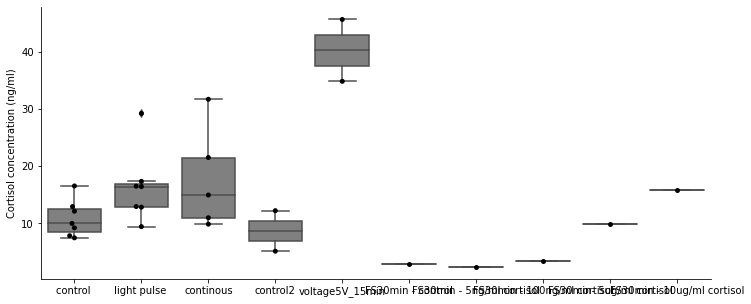

In [9]:
ax = plt.subplots(figsize =(12,5))
ax = sns.boxplot(x='Treatment', y='cortisol (ng/ml)', data=df3, dodge=True, color="grey")
ax = sns.swarmplot(x='Treatment', y='cortisol (ng/ml)', 
                          data=df3, dodge=True, color="black")

sns.despine()
ax.set(xlabel="", ylabel = "Cortisol concentration (ng/ml)")
plt.savefig(r'D:\cortisol_luminescence_cortisol-treatment\plots\cortisol_treatment_boxplot.pdf')


In [14]:
#define samples
group1 = df[df['Treatment']=='control ']
group2 = df[df['Treatment']=='light pulse ']

#perform independent two sample t-test
stats.ttest_ind(group1['cortisol (ng/ml)'], group2['cortisol (ng/ml)'],alternative ='less')

Ttest_indResult(statistic=-2.060075251438774, pvalue=0.030881322745542148)

In [16]:
group1 = df[df['Treatment']=='control ']
group2 = df[df['Treatment']=='continous']

#perform independent two sample t-test
stats.ttest_ind(group1['cortisol (ng/ml)'], group2['cortisol (ng/ml)'], alternative ='less')

Ttest_indResult(statistic=-1.9027980758291383, pvalue=0.043111804743258327)

In [18]:
group1 = df[df['Treatment']=='control2']
group2 = df[df['Treatment']=='voltage5V_15min']

#perform independent two sample t-test
stats.ttest_ind(group1['cortisol (ng/ml)'], group2['cortisol (ng/ml)'],alternative ='less')

Ttest_indResult(statistic=-4.882817748197225, pvalue=0.019738004484253)

In [27]:
group1 = df[df['Treatment']=='FS30min_control']
group2 = df[df['Treatment']=='FS30min _5ngml_cortisol']

#perform independent two sample t-test
stats.ttest_ind(group1['cortisol (ng/ml)'], group2['cortisol (ng/ml)'],alternative ='less')

Ttest_indResult(statistic=nan, pvalue=nan)

In [20]:
group1 = df[df['Treatment']=='FS30min - control']
group2 = df[df['Treatment']=='FS30min - 100ng/ml cortisol']

#perform independent two sample t-test
stats.ttest_ind(group1['cortisol (ng/ml)'], group2['cortisol (ng/ml)'],alternative ='less')

Ttest_indResult(statistic=nan, pvalue=nan)

In [35]:
group1 = df[df['Treatment']=='FS30min_control']
group2 = df[df['Treatment']=='FS30min _10ugml_cortisol']


#perform independent two sample t-test
stats.ttest_1samp(group1['cortisol (ng/ml)'], group2['cortisol (ng/ml)'],alternative ='less')

Ttest_1sampResult(statistic=Series([], Name: cortisol (ng/ml), dtype: float64), pvalue=array([], dtype=float64))